<a href="https://colab.research.google.com/github/Advait177013/ML_CSE4020/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_test=pd.read_csv("/content/sample_data/california_housing_test.csv")
df_train=pd.read_csv("/content/sample_data/california_housing_train.csv")
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
#Linear Regression
#Regression Tree

In [20]:
X_train=df_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y_train=df_train['median_house_value']
X_test=df_test[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y_test=df_test['median_house_value']

In [21]:
lreg=LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [22]:
print(lreg.score(X_test, y_test))

0.6195057678312047


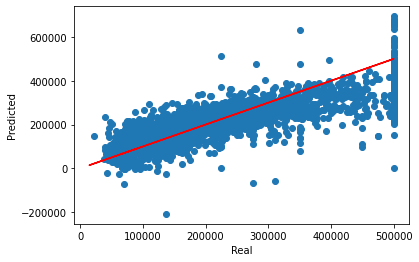

In [34]:
y_pred = lreg.predict(X_test)
plt.scatter(y_test, y_pred, label="Real Comparison")
plt.plot(y, y, '-r', label="Ideal accuracy")

plt.xlabel("Real")
plt.ylabel("Predicted")

plt.show()
# Data scatter of predicted values


In [33]:
from sklearn import metrics
print("mean abs error - auto : \t", metrics.mean_absolute_error(y_test, y_pred))
print("mean sqr error - auto : \t", metrics.mean_squared_error(y_test, y_pred))
print("rmse error - auto : \t", metrics.r2_score(y_test, y_pred))

mean abs error - auto : 	 50352.22825794297
mean sqr error - auto : 	 4867205486.928806
rmse error - auto : 	 0.6195057678312047


In [36]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 0)

dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
print(dtreg.score(X_test, y_test))

0.6423066356763343


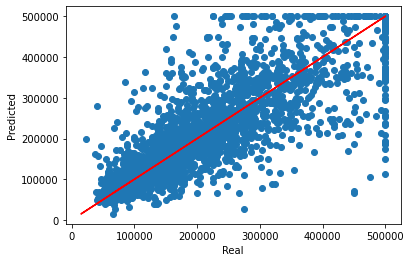

In [38]:
y_pred = dtreg.predict(X_test)
plt.scatter(y_test, y_pred, label="Real Comparison")
plt.plot(y, y, '-r', label="Ideal accuracy")

plt.xlabel("Real")
plt.ylabel("Predicted")

plt.show()
# Data scatter of predicted values

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0270191 to fit



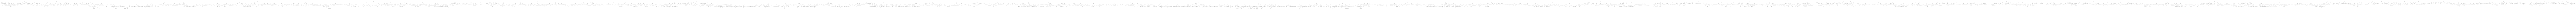

In [41]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
dot_data = StringIO()
export_graphviz(dtreg, out_file =dot_data, feature_names =['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

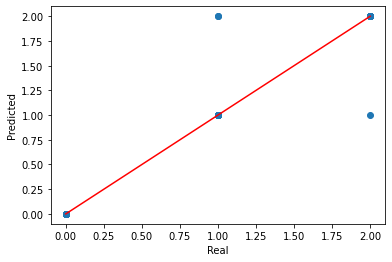

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

plt.scatter(y_test, y_pred, label="Predicted")
plt.plot(y, y, '-r', label="Ideal accuracy")

plt.xlabel("Real")
plt.ylabel("Predicted")

plt.show()

In [45]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


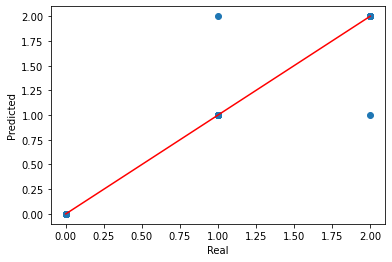

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.scatter(y_test, y_pred, label="Predicted")
plt.plot(y, y, '-r', label="Ideal accuracy")

plt.xlabel("Real")
plt.ylabel("Predicted")

plt.show()

In [47]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9666666666666667
